In [84]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score
from sklearn.metrics import precision_score, recall_score ,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

%matplotlib inline

In [85]:
# Importing data

filepath = 'data.csv'
data = pd.read_csv(filepath)

In [86]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest             6819 non-null   float64
 2    ROA(A) before interest and % after tax                              6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax                   6819 non-null   float64
 4    operating gross margin                                              6819 non-null   float64
 5    realized sales gross margin                                         6819 non-null   float64
 6    operating profit rate                                               6819 non-null   float64
 7    tax P

<h6>After having a careful look at the data we can conclude that:</h6>
           
        <li> There are 96 columns and 6819 row </li>
        <li> All data is numerical of type int64 or float64</li>
        <li> There are no null values</li>
    

In [88]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [89]:
# checking for null values
[print(col) for col in data if data[col].isna().sum() > 0]

[]

In [90]:
#checking for duplicate values
data.duplicated().sum()

0

C:\Users\admin\anaconda3\envs\bankruptcy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


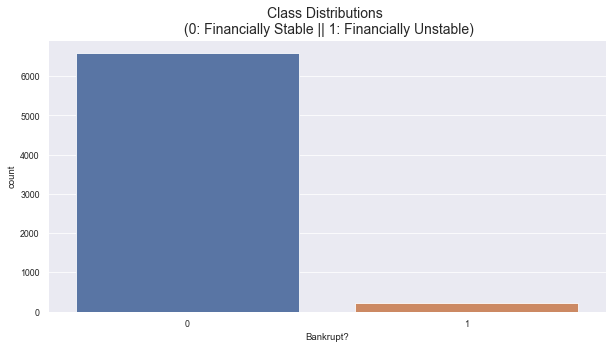

In [91]:
sns.set_theme(context = 'paper')
plt.figure(figsize = (10,5))
sns.countplot(data['Bankrupt?'])
plt.title('Class Distributions \n (0: Financially Stable || 1: Financially Unstable)', fontsize=14)
plt.show()

<h4>As we can see the data is imbalanced and this is a problem we need to solve to get good performance</h4>

In [92]:
X = data.copy()
y = data['Bankrupt?']


print('Financially stable: ', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
print('-'*45)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset
---------------------------------------------
Label Distributions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


In [93]:
# Lets shuffle the data before creating the subsamples

df = data.sample(frac=1)

# amount of fraud classes 220 rows

unstable_df = df.loc[df['Bankrupt?'] == 1]
stable_df = df.loc[df['Bankrupt?'] == 0][:220]

normal_distributed_df = pd.concat([unstable_df, stable_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=20)
print(new_df.shape)
new_df.head()

(440, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
2976,1,0.460927,0.516736,0.513464,0.597580,0.597580,0.998975,0.797142,0.809087,0.303079,...,0.780254,0.024747,0.625099,0.597579,0.837937,0.287384,0.026170,0.557967,1,0.017852
5387,0,0.545995,0.596489,0.594304,0.613298,0.613298,0.999130,0.797584,0.809468,0.303527,...,0.833536,0.000548,0.624245,0.613293,0.842417,0.277178,0.026795,0.565177,1,0.049001
3613,0,0.532199,0.593328,0.578082,0.623654,0.623683,0.999162,0.797725,0.809598,0.303707,...,0.838087,0.014495,0.623811,0.623650,0.842392,0.276111,0.026799,0.565194,1,0.077937
5820,0,0.475406,0.537833,0.526902,0.596679,0.596708,0.998936,0.797415,0.809330,0.303639,...,0.798202,0.004318,0.623725,0.596678,0.840218,0.279420,0.027739,0.567541,1,0.030660
5461,0,0.522985,0.589130,0.579849,0.601976,0.601933,0.999031,0.797485,0.809403,0.303561,...,0.823851,0.004908,0.624250,0.601972,0.842659,0.281592,0.026894,0.565605,1,0.024239


C:\Users\admin\anaconda3\envs\bankruptcy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


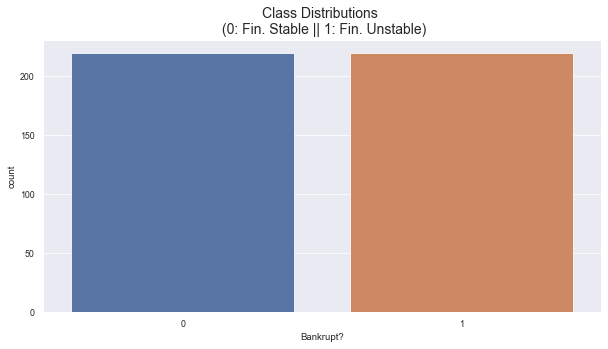

In [94]:
sns.set_context("paper")

plt.figure(figsize = (10,5))
sns.countplot(new_df['Bankrupt?'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

In [95]:
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'],axis=1)

# Splitting the data into Train & Test sets

Xtrain,X_test,ytrain,y_test = train_test_split(new_df,labels,
                                               test_size = 0.1,
                                               stratify = labels,
                                               shuffle = True)

# Splitting the data into Train & valiation sets

X_train,X_val,y_train,y_val = train_test_split(Xtrain,ytrain,
                                               test_size = 0.1,
                                               stratify = ytrain,
                                               shuffle = True)

In [96]:
#XGBRegressor (Undersampled Data)

xgb_model  = XGBRegressor(n_estimators=250,learning_rate=0.05)

xgb_mod = xgb_model.fit(X_train,y_train,
                       eval_set = [(X_val, y_val)],
                        early_stopping_rounds=5,
                        verbose=0
                       )
xgb_pred = xgb_mod.predict(X_val)

xgb_pred = xgb_pred>0.5

print(classification_report(y_val,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



In [97]:
# Catboost Classifier

cat = CatBoostClassifier(loss_function = 'Logloss',
                        eval_metric = 'BalancedAccuracy',
                        verbose = 200,
                        random_seed = 20)

cat_mod = cat.fit(X_train,y_train,
                   eval_set = (X_val,y_val),
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_preds = cat_mod.predict(X_val)

print(classification_report(y_val, cat_preds))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



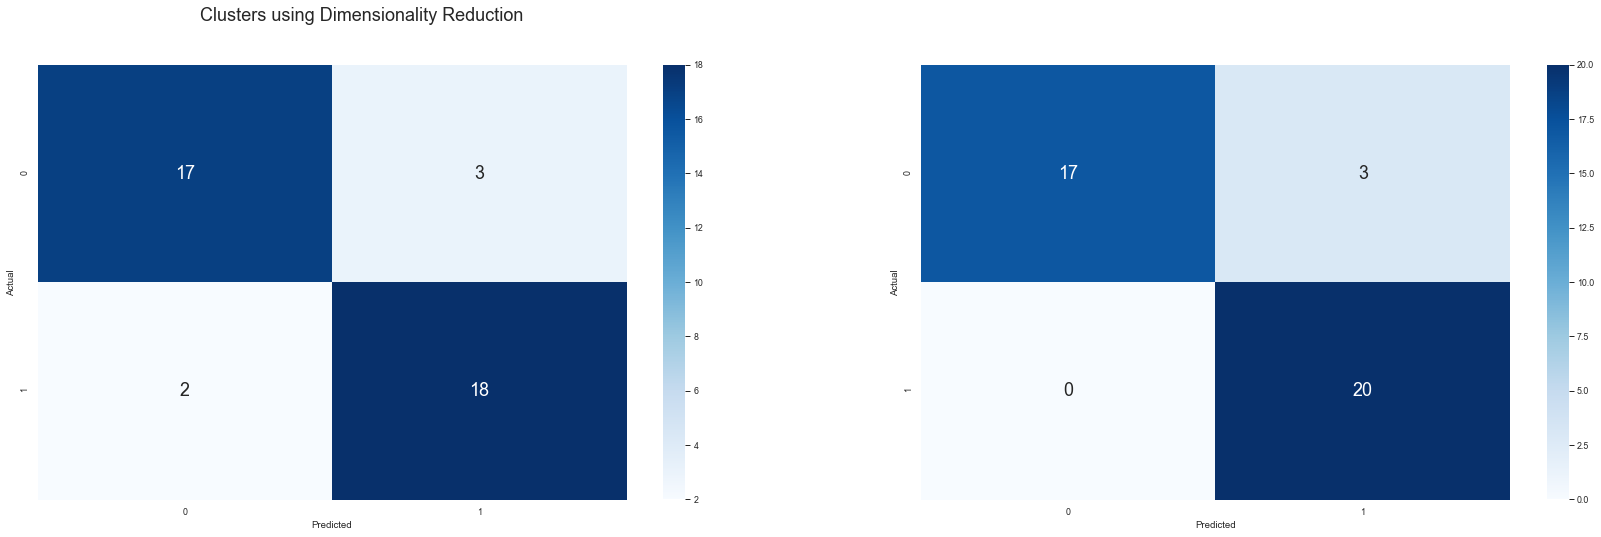

In [98]:

conf_mx0 = confusion_matrix(y_val,xgb_pred)
conf_mx1 = confusion_matrix(y_val,cat_preds)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val), index = np.unique(y_val))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicted'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val), index = np.unique(y_val))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=18)
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0, cmap="Blues", annot=True, annot_kws={"size": 18},fmt='g', ax = ax1)# font size
sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 18},fmt='g', ax = ax2)# font size
plt.show()

<h2>Synthetic Minority Over-sampling Technique (SMOTE)</h2>
Let's see if SMOTE as an over sampling technique works better over Undersampling
    
    

In [99]:
labels_original = data['Bankrupt?']
bank_data = data.drop(['Bankrupt?'],axis = 1)

In [100]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(bank_data, labels_original)
counter = Counter(y_smote)
print(counter)

Counter({1: 6599, 0: 6599})


C:\Users\admin\anaconda3\envs\bankruptcy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


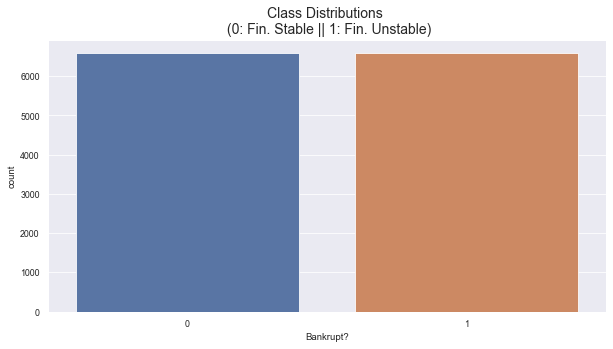

In [101]:
sns.set_context("paper")

plt.figure(figsize = (10,5))
sns.countplot(y_smote)
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

In [102]:
# Splitting the data

X_t_sm,X_test_sm,y_t_sm,y_test_sm = train_test_split(X_smote,y_smote,
                                               test_size = 0.1,
                                               stratify = y_smote,
                                               shuffle = True)

X_train_sm,X_val_sm,y_train_sm,y_val_sm = train_test_split(X_t_sm,y_t_sm,
                                               test_size = 0.1,
                                               stratify = y_t_sm,
                                               shuffle = True)

In [103]:
#XGBRegressor (Oversampling)

xgb_model_sm  = XGBRegressor(n_estimators=250,learning_rate=0.05)

xgb_mod_sm = xgb_model_sm.fit(X_train_sm,y_train_sm,
                       eval_set = [(X_val_sm, y_val_sm)],
                        early_stopping_rounds=5,
                        verbose=0
                       )
xgb_pred_sm = xgb_mod_sm.predict(X_val_sm)

xgb_pred_sm = xgb_pred_sm>0.5

print(classification_report(y_val_sm,xgb_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       594
           1       0.96      1.00      0.98       594

    accuracy                           0.98      1188
   macro avg       0.98      0.98      0.98      1188
weighted avg       0.98      0.98      0.98      1188



In [104]:
cat = CatBoostClassifier(loss_function = 'Logloss',
                        eval_metric = 'BalancedAccuracy',
                        verbose = 200,
                        random_seed = 20)

cat_mod_sm = cat.fit(X_train_sm,y_train_sm,
                   eval_set = (X_val_sm,y_val_sm),
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_preds_sm = cat_mod_sm.predict(X_val_sm)

print(classification_report(y_val_sm, cat_preds_sm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       594
           1       0.97      1.00      0.99       594

    accuracy                           0.98      1188
   macro avg       0.99      0.98      0.98      1188
weighted avg       0.99      0.98      0.98      1188



Let's see the 20 most important features which our algorithm uses to arrive at the final prediction

In [105]:
# Features' importance of our model

feat_imp = cat_mod_sm.get_feature_importance(prettified=True)
feat_imp[:20]

,Feature Id,Importances
0,total debt/total net worth,4.323361
1,cash turnover rate,4.303349
2,interest-bearing debt interest rate,4.053164
3,research and development expense rate,3.527392
4,continuous interest rate (after tax),2.871850
5,Degree of financial leverage (DFL),2.868167
6,current asset turnover rate,2.773018
7,allocation rate per person,2.640823
8,average collection days,2.565959
9,inventory turnover rate (times),2.408606


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

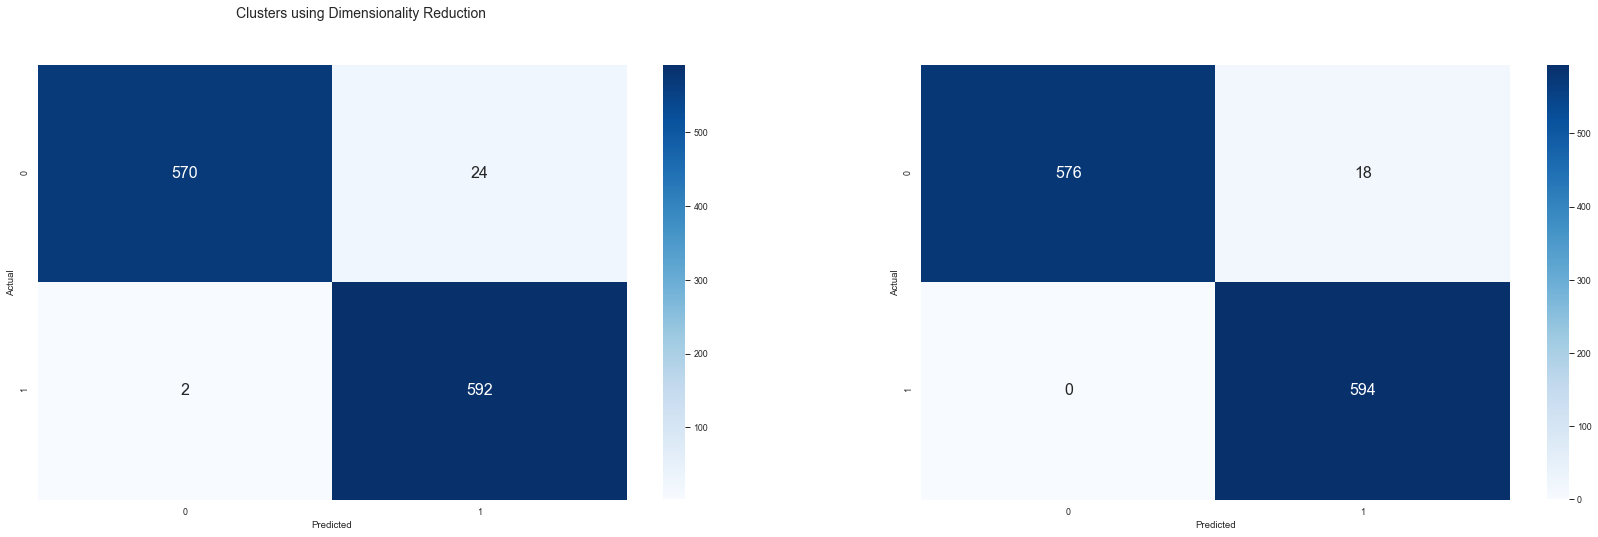

In [106]:
# Plotting the confusion matrix 
conf_mx2 = confusion_matrix(y_val_sm,xgb_pred_sm)
conf_mx3 = confusion_matrix(y_val_sm,cat_preds_sm)

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(conf_mx3, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax1)# font size
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax2)# font size


<b> Let's see the final performance of our best model on the test data </b>


In [107]:
# TESTING 

test_pred = cat_mod_sm.predict(X_test_sm)
print(classification_report(y_test_sm, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       660
           1       0.97      1.00      0.99       660

    accuracy                           0.99      1320
   macro avg       0.99      0.99      0.99      1320
weighted avg       0.99      0.99      0.99      1320

